# Introduction/ Business Problem

Imagine you are working for a global player and got an offer for an awesome position at their location in Vancouver, BC, Canada. For the new job you have to move to Vancouver and therefor you are looking for a neighboorhood that offers you some opportunities for sports, education for your children, restaurants, public transportation and other kinds of entertainment. The distance to your new workplace and the airport are also relevant criterias.

# The Data

This project will use data from the Foursquare Places API, especially from the Arts & Entertainment, College & University, Food and Athletics & Sports categories and the venues endpoint group. Also for getting informations about all existing neighborhoods in Vancouver the information of the table under the following link (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V) is extracted and filtered for the city of Vancouver, BC. 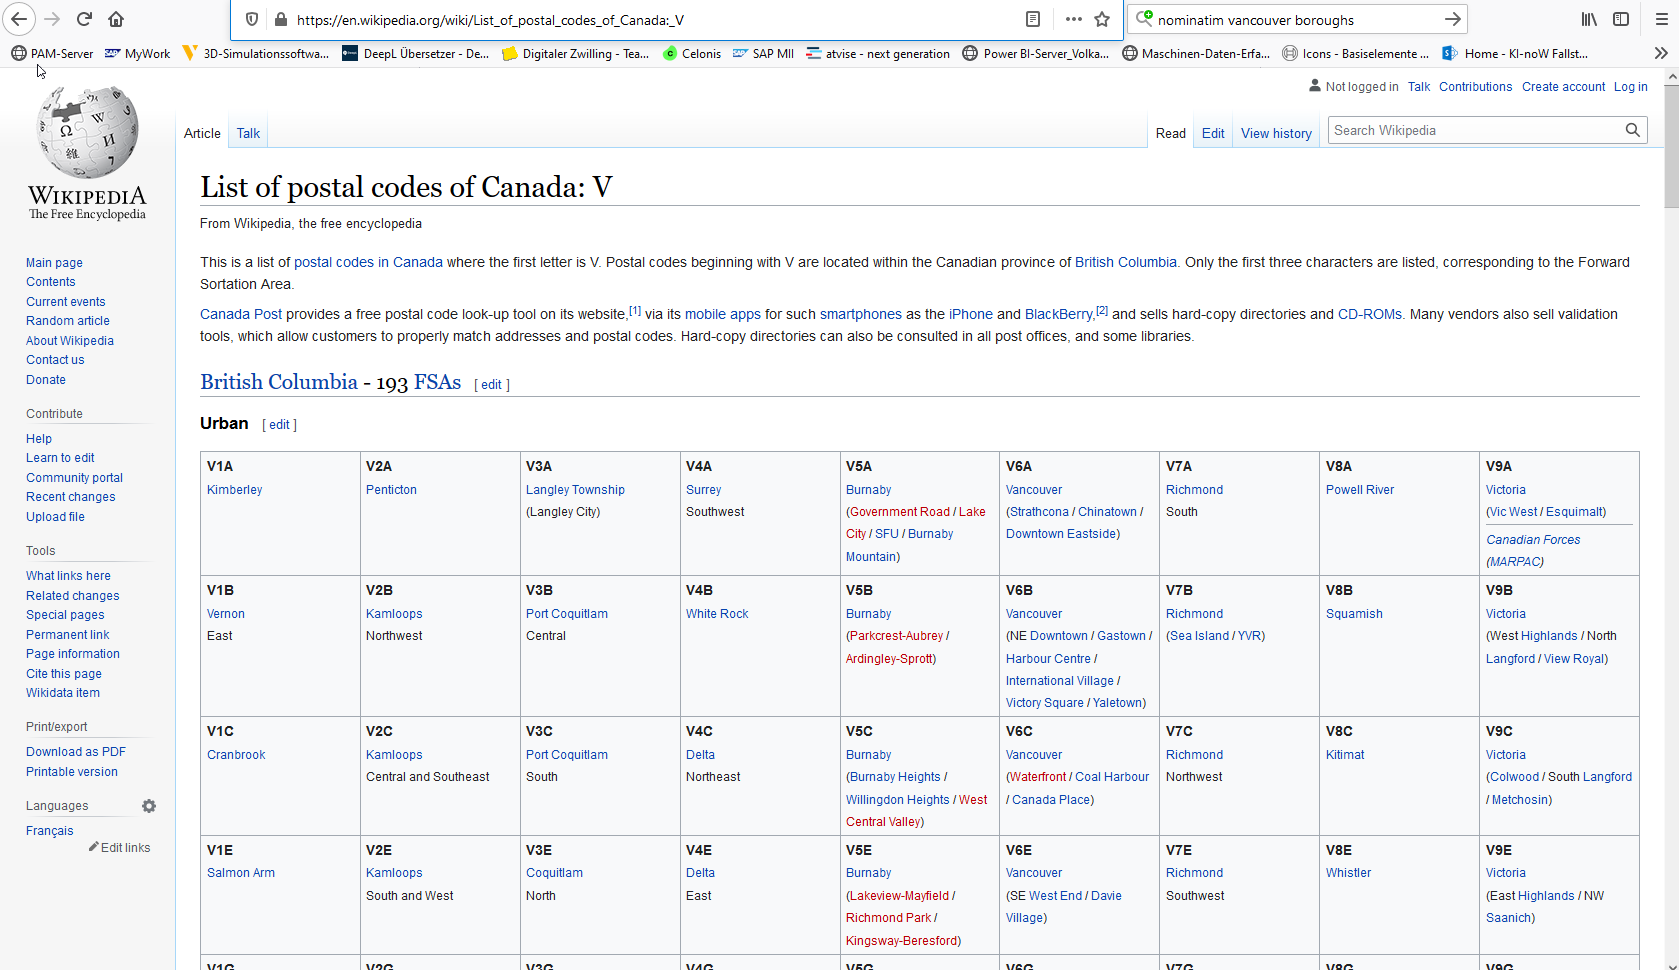To get the coordinates the geocoder package is used. I am going to use the neighborhoods in Vancouver, the data about the relevant venues from the foursquare api and the one from geocoder to to determine the density of relevant venues inside the neighborhoods and cluster regions 

# The Methodology


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import geocoder
import folium 

## Request HTML Document from Wikipedia-URL 

In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: V - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5083480e-e1c0-42bc-89ee-c60ff1346e33","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_V","wgTitle":"List of postal codes of Canada: V","wgCurRevisionId":1049856671,"wgRevisionId":1049856671,"wgArticleId":966743,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in British 

## Extract Table Data from HTML Document and create DataFrame

In [3]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    elif 'Vancouver' not in row.span.text:
        pass
    else:
        cell['PostalCode'] = row.b.text[:3]
        if '(' in row.span.text:
            cell['Borough'] = (row.span.text).split('(')[0]
            cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        else:
            cell['Borough'] = (row.span.a.text)
            cell['Neighborhood'] = (row.span.text.split('Vancouver')[1])
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
df['Neighborhood']=df['Neighborhood'].replace({'district municipality Outer East':'Outer East',
                                             'district municipality Inner East':'Inner East',
                                             'district municipality East Central':'East Central','district municipality North Central':'North Central',
                                             'city South Central':'South Central', 'city Southwest Central': 'Southwest Central', 'district municipality Northwest Central':'Northwest Central', 
                                             'city Southwest': 'Southwest', 'district municipality Northwest': 'Northwest'})
df

,PostalCode,Borough,Neighborhood
0,V6A,Vancouver,"Strathcona, Chinatown, Downtown Eastside"
1,V6B,Vancouver,"NE Downtown, Gastown, Harbour Centre, Internat..."
2,V6C,Vancouver,"Waterfront, Coal Harbour, Canada Place"
3,V6E,Vancouver,"SE West End, Davie Village"
4,V6G,Vancouver,"NW West End, Stanley Park"
5,V7G,North Vancouver,Outer East
6,V6H,Vancouver,"West Fairview, Granville Island, NE Shaughnessy"
7,V7H,North Vancouver,Inner East
8,V6J,Vancouver,"NW Shaughnessy, East Kitsilano, Quilchena"
9,V7J,North Vancouver,East Central


In [4]:
df.shape

(44, 3)

## Adding Latitude and Longitude Values to DataFrame

In [5]:
def get_lat_lng(postal_code):
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.google('{}, Vancouver, British Columbia'.format(postal_code))
      lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print('Postal Code: {}, Latitude: {}, Longitude{}'. format(postal_code, latitude, longitude))

In [6]:

def get_lats_longs(df): 

    lat_lng_coords = None
    # create lists to store our new lats and longs
    lats = []
    longs=[]
    #loop through our dataframe and look up the lat/long of each postal code
    for index, row in df.iterrows():
        postal_code=row[0]
        # loop until you get the coordinates
        lat_lng_coords = None
        while(lat_lng_coords is None):
            g = geocoder.arcgis('{}, Vancouver, British Columbia'.format(postal_code))
            lat_lng_coords = g.latlng

        lats.append(lat_lng_coords[0])
        longs.append(lat_lng_coords[1])

    df['Latitude'] = lats
    df['Longitude'] = longs
    return df
get_lats_longs(df)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,V6A,Vancouver,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649
1,V6B,Vancouver,"NE Downtown, Gastown, Harbour Centre, Internat...",49.280395,-123.112850
2,V6C,Vancouver,"Waterfront, Coal Harbour, Canada Place",49.285690,-123.116122
3,V6E,Vancouver,"SE West End, Davie Village",49.283560,-123.129442
4,V6G,Vancouver,"NW West End, Stanley Park",49.296860,-123.137590
5,V7G,North Vancouver,Outer East,49.344865,-122.947340
6,V6H,Vancouver,"West Fairview, Granville Island, NE Shaughnessy",49.254441,-123.131720
7,V7H,North Vancouver,Inner East,49.316395,-122.990082
8,V6J,Vancouver,"NW Shaughnessy, East Kitsilano, Quilchena",49.260026,-123.146545
9,V7J,North Vancouver,East Central,49.334795,-123.012844


## Get Location Data for Vancouver 

Getting the Latitude and Longitude values fort Vancouver, BC with geocoders.Nominatim

In [7]:
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [8]:
address = 'Vancouver, Canada'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.113952.


## Create a Map of Vancouver

Create Map of the city of Vancouver and visualize the locations of their neighboorhoods with pointers

In [9]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

## Get Venues from Foursquare API

Request venues in the range of 500m from the centre of all neighboorhoods from Foursquare API and put them into a pandas DataFrame for further analysis

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Category Id']
    
    return(nearby_venues)

In [12]:
vancouver_venues = getNearbyVenues(names=df['Neighborhood'],
                                  latitudes=df['Latitude'],
                                  longitudes=df['Longitude'])

Strathcona, Chinatown, Downtown Eastside
NE Downtown, Gastown, Harbour Centre, International Village, Victory Square, Yaletown
Waterfront, Coal Harbour, Canada Place
SE West End, Davie Village
NW West End, Stanley Park
Outer East
West Fairview, Granville Island, NE Shaughnessy
Inner East
NW Shaughnessy, East Kitsilano, Quilchena
East Central
North Hastings-Sunrise
Central Kitsilano, Greektown
North Central
North Grandview-Woodland
NW Arbutus Ridge, NE Dunbar-Southlands
South Central
South Hastings-Sunrise, North Renfrew-Collingwood
South Shaughnessy, NW Oakridge, NE Kerrisdale, SE Arbutus Ridge
Southwest Central
South Grandview-Woodland, NE Kensington-Cedar Cottage
West Kerrisdale, South Dunbar-Southlands, Musqueam
Northwest Central
SE Kensington-Cedar Cottage, Victoria-Fraserview
SE Kerrisdale, SW Oakridge, West Marpole
Southwest
South Renfrew-Collingwood
West Kitsilano, West Point Grey, Jericho
Northwest
Killarney
NW Dunbar-Southlands, Chaldecutt, South University Endowment Lands
Nor

In [13]:
vancouver_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category Id
Venue Category,,,,,,,
Accessories Store,2,2,2,2,2,2,2
Airport Terminal,1,1,1,1,1,1,1
American Restaurant,9,9,9,9,9,9,9
Amphitheater,1,1,1,1,1,1,1
Art Gallery,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
Warehouse Store,1,1,1,1,1,1,1
Waterfront,1,1,1,1,1,1,1
Wine Bar,2,2,2,2,2,2,2


## Calculate and add distance from neighborhood to airport and workplace to DataFrame

In [14]:
from math import radians, cos, sin, asin, sqrt
def distance_to_point(lat1, lat2, lon1, lon2):
    distances = []
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    for lat1, lon1 in zip(lat1, lon1):
        lon1 = radians(lon1)
        lat1 = radians(lat1)  
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * asin(sqrt(a))
        r = 6371
        distance = c*r
        distances.append(distance)
    distances = pd.Series(distances, name='Distance')
    return(distances)


In [15]:
vancouver_venues['Distance Airport'] = distance_to_point(vancouver_venues['Neighborhood Latitude'], 49.193889,vancouver_venues['Neighborhood Longitude'], -123.184444) 
vancouver_venues['Distance Work'] = distance_to_point(vancouver_venues['Neighborhood Latitude'], 49.285350,vancouver_venues['Neighborhood Longitude'], -123.119295)

In [16]:
vancouver_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category Id,Distance Airport,Distance Work
0,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,Union Market,49.277371,-123.086989,Deli / Bodega,4bf58dd8d48988d146941735,11.643059,2.287132
1,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,Finch’s Market,49.278565,-123.093473,Sandwich Place,4bf58dd8d48988d1c5941735,11.643059,2.287132
2,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,The Juice Truck,49.281281,-123.092120,Food Truck,4bf58dd8d48988d1cb941735,11.643059,2.287132
3,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,MacLean Park,49.278809,-123.088546,Park,4bf58dd8d48988d163941735,11.643059,2.287132
4,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,Strathcona Park,49.275183,-123.084919,Park,4bf58dd8d48988d163941735,11.643059,2.287132
...,...,...,...,...,...,...,...,...,...,...
885,SW Downtown,49.277450,-123.128688,La Churreria,49.280521,-123.131218,Mexican Restaurant,4bf58dd8d48988d1c1941735,10.135120,1.111694
886,SW Downtown,49.277450,-123.128688,Shoppers Drug Mart,49.280865,-123.131550,Pharmacy,4bf58dd8d48988d10f951735,10.135120,1.111694
887,SW Downtown,49.277450,-123.128688,Moxie's Classic Grill,49.281107,-123.132372,American Restaurant,4bf58dd8d48988d14e941735,10.135120,1.111694
888,SW Downtown,49.277450,-123.128688,Davie Street Party,49.280260,-123.131076,Nightclub,4bf58dd8d48988d11f941735,10.135120,1.111694


## Data Preparation for Clustering 

In [17]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood,  distance airport, distance work columns back to dataframe
vancouver_onehot['Distance Airport'] = vancouver_venues['Distance Airport']
vancouver_onehot['Distance Work'] = vancouver_venues['Distance Work']
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()
vancouver_grouped.head(10)

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Distance Airport,Distance Work
0,Bentall Centre,0.0,0.014085,0.014085,0.0,0.014085,0.0,0.0,0.0,0.014085,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.014085,11.318245,0.139126
1,"Central Kitsilano, Greektown",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.020408,0.020408,0.000000,0.0,0.0,0.020408,0.020408,8.259293,3.904549
2,East Central,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,20.013302,9.475410
3,"East Fairview, South Cambie",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.050000,0.000000,0.0,0.0,0.000000,0.000000,7.512215,4.265590
4,East Mount Pleasant,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.000000,10.240643,3.214351
5,Inner East,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,19.609698,9.984823
6,Killarney,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,10.656863,9.615293
7,"NE Downtown, Gastown, Harbour Centre, Internat...",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.020408,0.0,0.0,0.000000,0.000000,10.933624,0.722592
8,"NW Arbutus Ridge, NE Dunbar-Southlands",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.376063,5.188828
9,"NW Dunbar-Southlands, Chaldecutt, South Univer...",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.134252,6.656456


## Cluster Neighborhoods
### Define Numbers of Clusters - Elbow Method 

In [18]:
vancouver_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vancouver_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

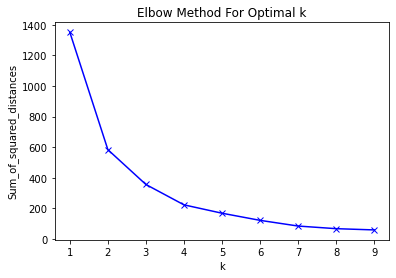

In [19]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

According to the visualization of the **Elbow Method** above I choose **4** as the **number of clusters**. 

## Visualization Neighborhoods with 4 Clusters 

In [20]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 2, 3, 0, 2, 3, 0, 3, 3])

In [21]:
vancouver_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = df

vancouver_merged = vancouver_merged.join(vancouver_grouped.set_index('Neighborhood'), on='Neighborhood', how='inner')

vancouver_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,...,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Distance Airport,Distance Work
0,V6A,Vancouver,"Strathcona, Chinatown, Downtown Eastside",49.278345,-123.089649,0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,11.643059,2.287132
1,V6B,Vancouver,"NE Downtown, Gastown, Harbour Centre, Internat...",49.280395,-123.112850,0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.020408,0.0,0.0,0.00,0.00,10.933624,0.722592
2,V6C,Vancouver,"Waterfront, Coal Harbour, Canada Place",49.285690,-123.116122,0,0.01,0.0,0.02,0.0,...,0.0,0.0,0.01,0.000000,0.0,0.0,0.00,0.01,11.349084,0.233231
3,V6E,Vancouver,"SE West End, Davie Village",49.283560,-123.129442,0,0.00,0.0,0.02,0.0,...,0.0,0.0,0.01,0.000000,0.0,0.0,0.01,0.01,10.740829,0.762419
4,V6G,Vancouver,"NW West End, Stanley Park",49.296860,-123.137590,0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,11.944365,1.843517


In [22]:
import numpy as np
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Describtion of different Cluster Characteristics

In [23]:
vancouver_cluster_grouped = vancouver_grouped.groupby('Cluster Labels').mean()

In [28]:
print("--- Top Features Cluster 0 (Red) ---")
print(vancouver_cluster_grouped.T[0].nlargest(10))

--- Top Features Cluster 0 (Red) ---
Distance Airport    10.955568
Distance Work        1.272441
Hotel                0.055504
Coffee Shop          0.055042
Restaurant           0.037259
Café                 0.031409
Sandwich Place       0.029140
Food Truck           0.027828
Park                 0.027230
Pub                  0.024165
Name: 0, dtype: float64


In [29]:
print("--- Top Features Cluster 1 (Purple) ---")
print(vancouver_cluster_grouped.T[1].nlargest(10))

--- Top Features Cluster 1 (Purple) ---
Distance Airport       14.556523
Distance Work           5.621962
Martial Arts School     0.111111
Park                    0.057961
Coffee Shop             0.045463
Bank                    0.041005
Market                  0.041005
Playground              0.037037
Bakery                  0.032915
Pharmacy                0.028620
Name: 1, dtype: float64


In [30]:
print("--- Top Features Cluster 2 (blue) ---")
print(vancouver_cluster_grouped.T[2].nlargest(10))

--- Top Features Cluster 2 (blue) ---
Distance Airport              20.453139
Distance Work                  9.898001
Trail                          0.432540
Convenience Store              0.166667
Construction & Landscaping     0.083333
Deli / Bodega                  0.083333
Pet Store                      0.083333
Park                           0.055556
Bus Stop                       0.023810
Coffee Shop                    0.023810
Name: 2, dtype: float64


In [31]:
print("--- Top Features Cluster 3 (yellow) ---")
print(vancouver_cluster_grouped.T[3].nlargest(10))

--- Top Features Cluster 3 (yellow) ---
Distance Airport      7.589144
Distance Work         6.086795
Coffee Shop           0.089993
Chinese Restaurant    0.085579
Pool                  0.055556
Bus Stop              0.054866
Park                  0.047298
Indian Restaurant     0.035209
Bank                  0.032459
Sushi Restaurant      0.031895
Name: 3, dtype: float64


# The Results

There are **4 different clusters** that can be described as follows:

**Cluster 0**:

* moderate distance to airport
* short distance to work
* lots of hotels
* lots of restaurants and cafés
* a few parks

**Cluster 1**:

* far distance to airport
* moderate distance to work
* sports facilities and parks 
* coffee shops and bakeries 

**Cluster 2**:

* far distance to airport
* far distance to work 
* lots of trails and parks, close to nature
* a few coffee shops 

**Cluster 3**:

* close distance to airport
* close to moderate distance to work
* lots of restaurants and coffee shops
* good public transport 
* many parks 

According to our described business problem I would try to find an accomodation in the neighborhoods of **Cluster 3.** Because the venues in cluster 3 and also the distances to airport and workplace fits our requirements the best.  

# Discussion

The results desribed above should just be seen as a starting point for further analysis and research. Especially the housing/rental prices and availability have not been considered during the analytics within this notebook and are definitely relevant for the decision making process. Also some crime stats and soft factors like noise, air quality etc. could be interesting for deciding where to move to.  

# Conclusion

Purpose of this project was to identify Vancouver neighborhoods close to the new working place and airport with high number of restaurants, cafés, sports facilities and public transportation and also the possibility for proper education in order to aid stakeholders in narrowing down the search for optimal location for their new home in Vancouver. By calculating venue density distribution from Foursquare data and the distances between the different neighborhoods and the airport and the new workplace we clustered the neighboorhoods in order to create major zones of interest.

Final decision on optimum housing location will be made by stakeholders based on specific characteristics of neighborhoods and locations in recommended zone cluster 3, taking into consideration additional factors like attractiveness of each location levels of noise / proximity to major roads, housing availability, prices, social dynamics of every neighborhood etc.